# **Expected Goals Classifier**

# Overview

Create an Expected Goals (xG) classification model using existing historical match data to produce actionable recommendations which can be utilized in technical and tactical analysis to improve goal-scoring.

Project detailed on Github: [Expected Goals Classifier]()

# Data Cleaning Notebook

Continued from expected_goals_data_extraction_notebook

*Notebook 2 of 7*

### Index

1. Data extracted in [expected_goals_data_extraction_notebook]()
2. Data cleaned in [expected_goals_data_cleaning_notebook]()
3. Data explored in [expected_goals_data_exploration_notebook]()
4. Features engineered in [expected_goals_feature_engineering_notebook]()
5. Data preprocessed in [expected_goals_data_preprocessing_notebook]()
6. Modeling in [expected_goals_model_fitting_notebook]()
7. Conclusions in [expected_goals_model_assessment_notebook]()

<a id = 'packages'></a>
# Packages

In [33]:
# rpy2 to run R
%load_ext rpy2.ipython

# Drive  and IO to access saved files
from google.colab import drive, files
drive.mount('/content/drive')

import io

# PyPy to improve speed
!apt-get install pypy

# warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas for dataframes
import pandas as pd

# Numpy and math for mathematical functions
import numpy as np

import math
from math import atan2

# ProfileReport, SweetViz, and AutoViz for exploratory data analysis

!pip install http://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport as pr

!pip install sweetviz
import sweetviz as sv

!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class as av

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pypy is already the newest version (5.10.0+dfsg-3build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Using cached http://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# Data

Data sourced from [StatsBomb](https://statsbomb.com/), a United Kingdom based football (soccer) data analytics company.

StatsBomb have provided free access to their proprietary dataset via GitHub: [StatsBomb Open Data](https://github.com/statsbomb/open-data)

In [317]:
# Import extracted_data from expected_goals_data_extraction_notebook

extracted_data = pd.read_parquet('/content/drive/MyDrive/flatiron/expected_goals/data_extraction/dataframes/extracted_data.parquet')

In [318]:
extracted_data.head()

,id,index_x,period_x,timestamp_x,minute_x,second_x,type_x,possession_x,possession_team_x,play_pattern_x,team_x,player_x,position_x,location_x,duration_x,under_pressure_x,related_events_x,match_id_x,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique,shot_outcome,shot_type,shot_body_part,shot_freeze_frame,shot_one_on_one,shot_aerial_won,shot_open_goal,shot_first_time,out_x,shot_redirect,shot_deflected,off_camera_x,shot_saved_off_target,shot_saved_to_post,shot_follows_dribble,index_y,period_y,timestamp_y,...,second_y,type_y,possession_y,possession_team_y,play_pattern_y,team_y,player_y,position_y,location_y,duration_y,related_events_y,match_id_y,pass_recipient,pass_length,pass_angle,pass_height,pass_end_location,pass_body_part,pass_type,under_pressure_y,pass_outcome,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,off_camera_y,pass_switch,pass_through_ball,pass_technique,pass_backheel,pass_cross,counterpress,pass_cut_back,pass_deflected,pass_goal_assist,pass_miscommunication,pass_inswinging,pass_straight,pass_outswinging,pass_no_touch,out_y
0,8f5a3b7c-db0b-42ec-bac0-adc0bedca2ea,258,1,00:04:38.609,4,38,Shot,11,Chelsea FCW,Regular Play,Chelsea FCW,Francesca Kirby,Center Forward,"[109.0, 46.0]",0.278800,True,"[011167bc-9cbc-46a3-9b7b-28065eab7af1, 2c37831...",19743,0.266154,"[112.0, 45.0]",bf82ea91-c3e3-4d8c-b91d-c9d0ccd44f11,Normal,Blocked,Open Play,Left Foot,"[{'location': [104.0, 50.0], 'player': {'id': ...",None,None,None,None,None,None,None,None,None,None,None,253.0,1.0,00:04:35.786,...,35.0,Pass,11.0,Chelsea FCW,Regular Play,Chelsea FCW,Bethany England,Left Midfield,"[95.0, 49.0]",1.361685,"[58da4d74-7684-405d-a8cc-bef1d658f1b6, 60d1337...",19743.0,Francesca Kirby,11.180340,0.463648,Ground Pass,"[105.0, 54.0]",Left Foot,None,True,None,None,8f5a3b7c-db0b-42ec-bac0-adc0bedca2ea,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,60ead7a6-4aa2-41ab-85a1-21357f50e4e0,542,1,00:11:45.046,11,45,Shot,24,Chelsea FCW,From Free Kick,Chelsea FCW,Bethany England,Left Midfield,"[113.0, 35.0]",0.256730,True,"[a4b77cbb-14d0-4bd3-ba8b-7312335098fe, b9b246c...",19743,0.093521,"[120.0, 32.9, 0.4]",b99082e1-812b-48dd-bf94-8856b1ff079b,Normal,Off T,Open Play,Head,"[{'location': [108.0, 45.0], 'player': {'id': ...",True,True,None,None,None,None,None,None,None,None,None,539.0,1.0,00:11:42.863,...,42.0,Pass,24.0,Chelsea FCW,From Free Kick,Chelsea FCW,Erin Cuthbert,Right Midfield,"[82.0, 54.0]",2.103800,[540a29f4-8533-4852-b492-307d124cf084],19743.0,Bethany England,37.735924,-0.558599,High Pass,"[114.0, 34.0]",Right Foot,Free Kick,None,None,None,60ead7a6-4aa2-41ab-85a1-21357f50e4e0,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,f68deb6f-0711-4b9d-8081-122dc3722c55,614,1,00:18:03.461,18,3,Shot,29,Chelsea FCW,Regular Play,Chelsea FCW,Drew Spence,Left Defensive Midfield,"[94.0, 43.0]",1.147883,True,"[3c03553f-3bed-4d21-8096-ed4ef269da62, bb13e23...",19743,0.036171,"[120.0, 42.8, 0.5]",5022d0b3-ea32-42a8-bd41-b46cc244beb9,Normal,Saved,Open Play,Left Foot,"[{'location': [118.0, 41.0], 'player': {'id': ...",None,None,None,None,None,None,None,None,None,None,None,610.0,1.0,00:18:01.596,...,1.0,Pass,29.0,Chelsea FCW,Regular Play,Chelsea FCW,So-yun Ji,Center Attacking Midfield,"[98.0, 60.0]",0.918187,"[753c6e78-72f9-4963-bcb7-c3e4ed58be6a, c884125...",19743.0,Drew Spence,11.180340,-2.034444,Ground Pass,"[93.0, 50.0]",Right Foot,None,True,None,None,f68deb6f-0711-4b9d-8081-122dc3722c55,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,f301190f-cc0a-4f16-8278-27e5279ea24e,877,1,00:23:11.935,23,11,Shot,43,Birmingham City WFC,From Goal Kick,Birmingham City WFC,Chloe Arthur,Right Back,"[86.0, 34.0]",2.161012,True,"[0bfe1b6c-d690-41a6-be3e-f9b6295ddd85, 570e15b...",19743,0.016625,"[119.0, 33.3, 0.5]",fdf4a564-4973-46e5-bc07-d84785f8c183,Normal,Off T,Open Play,Left Foot,"[{'location': [78.0, 58.0], 'player': {'id': 1...",None,None,None,

# Drop Features

In [319]:
print('Total Features:',
      extracted_data.shape[1])

Total Features: 81


In [320]:
list(extracted_data.columns.values.tolist())

['id',
 'index_x',
 'period_x',
 'timestamp_x',
 'minute_x',
 'second_x',
 'type_x',
 'possession_x',
 'possession_team_x',
 'play_pattern_x',
 'team_x',
 'player_x',
 'position_x',
 'location_x',
 'duration_x',
 'under_pressure_x',
 'related_events_x',
 'match_id_x',
 'shot_statsbomb_xg',
 'shot_end_location',
 'shot_key_pass_id',
 'shot_technique',
 'shot_outcome',
 'shot_type',
 'shot_body_part',
 'shot_freeze_frame',
 'shot_one_on_one',
 'shot_aerial_won',
 'shot_open_goal',
 'shot_first_time',
 'out_x',
 'shot_redirect',
 'shot_deflected',
 'off_camera_x',
 'shot_saved_off_target',
 'shot_saved_to_post',
 'shot_follows_dribble',
 'index_y',
 'period_y',
 'timestamp_y',
 'minute_y',
 'second_y',
 'type_y',
 'possession_y',
 'possession_team_y',
 'play_pattern_y',
 'team_y',
 'player_y',
 'position_y',
 'location_y',
 'duration_y',
 'related_events_y',
 'match_id_y',
 'pass_recipient',
 'pass_length',
 'pass_angle',
 'pass_height',
 'pass_end_location',
 'pass_body_part',
 'pass_typ

In [321]:
# Drop duplicate features

extracted_data.drop(['shot_saved_off_target',
                     'shot_saved_to_post',
                     'pass_outcome',
                     'pass_assisted_shot_id',
                     'pass_shot_assist',
                     'pass_goal_assist',
                     'pass_end_location',
                     'index_y',
                     'period_y',
                     'timestamp_y',
                     'minute_x',
                     'second_x',
                     'minute_y',
                     'second_y',
                     'type_y',
                     'possession_y',
                     'possession_team_y',
                     'play_pattern_y',
                     'team_y',
                     'player_y',
                     'position_y',
                     'location_y',
                     'duration_y',
                     'related_events_y',
                     'match_id_y',
                     'under_pressure_y',
                     'off_camera_y',
                     'out_y'],
                    axis = 1,
                    inplace = True)

In [322]:
print('Total Features:',
      extracted_data.shape[1])

Total Features: 53


In [323]:
list(extracted_data.columns.values.tolist())

['id',
 'index_x',
 'period_x',
 'timestamp_x',
 'type_x',
 'possession_x',
 'possession_team_x',
 'play_pattern_x',
 'team_x',
 'player_x',
 'position_x',
 'location_x',
 'duration_x',
 'under_pressure_x',
 'related_events_x',
 'match_id_x',
 'shot_statsbomb_xg',
 'shot_end_location',
 'shot_key_pass_id',
 'shot_technique',
 'shot_outcome',
 'shot_type',
 'shot_body_part',
 'shot_freeze_frame',
 'shot_one_on_one',
 'shot_aerial_won',
 'shot_open_goal',
 'shot_first_time',
 'out_x',
 'shot_redirect',
 'shot_deflected',
 'off_camera_x',
 'shot_follows_dribble',
 'pass_recipient',
 'pass_length',
 'pass_angle',
 'pass_height',
 'pass_body_part',
 'pass_type',
 'pass_aerial_won',
 'pass_switch',
 'pass_through_ball',
 'pass_technique',
 'pass_backheel',
 'pass_cross',
 'counterpress',
 'pass_cut_back',
 'pass_deflected',
 'pass_miscommunication',
 'pass_inswinging',
 'pass_straight',
 'pass_outswinging',
 'pass_no_touch']

In [324]:
# Drop features unrelated to shot-specific data

extracted_data.drop(['id',
                     'index_x',
                     'type_x',
                     'possession_x',
                     'possession_team_x',
                     'team_x',
                     'player_x',
                     'position_x',
                     'duration_x',
                     'related_events_x',
                     'match_id_x',
                     'shot_key_pass_id',
                     'shot_freeze_frame',
                     'out_x',
                     'off_camera_x',
                     'pass_recipient',
                     'pass_aerial_won'],
                    axis = 1,
                    inplace = True)

In [325]:
print('Total Features:',
      extracted_data.shape[1])

Total Features: 36


In [326]:
list(extracted_data.columns.values.tolist())

['period_x',
 'timestamp_x',
 'play_pattern_x',
 'location_x',
 'under_pressure_x',
 'shot_statsbomb_xg',
 'shot_end_location',
 'shot_technique',
 'shot_outcome',
 'shot_type',
 'shot_body_part',
 'shot_one_on_one',
 'shot_aerial_won',
 'shot_open_goal',
 'shot_first_time',
 'shot_redirect',
 'shot_deflected',
 'shot_follows_dribble',
 'pass_length',
 'pass_angle',
 'pass_height',
 'pass_body_part',
 'pass_type',
 'pass_switch',
 'pass_through_ball',
 'pass_technique',
 'pass_backheel',
 'pass_cross',
 'counterpress',
 'pass_cut_back',
 'pass_deflected',
 'pass_miscommunication',
 'pass_inswinging',
 'pass_straight',
 'pass_outswinging',
 'pass_no_touch']

## Reorder Columns

In [327]:
extracted_data = extracted_data[['shot_statsbomb_xg',
                                 'shot_outcome',
                                 'period_x',
                                 'timestamp_x',
                                 'location_x',
                                 'shot_end_location',
                                 'shot_technique',
                                 'shot_type',
                                 'shot_body_part',
                                 'shot_one_on_one',
                                 'shot_aerial_won',
                                 'shot_open_goal',
                                 'shot_first_time',
                                 'shot_redirect',
                                 'shot_deflected',
                                 'shot_follows_dribble',
                                 'under_pressure_x',
                                 'play_pattern_x',
                                 'counterpress',
                                 'pass_type',
                                 'pass_technique',
                                 'pass_length',
                                 'pass_angle',
                                 'pass_height',
                                 'pass_body_part',
                                 'pass_switch',
                                 'pass_through_ball',
                                 'pass_backheel',
                                 'pass_cross',
                                 'pass_cut_back',
                                 'pass_deflected',
                                 'pass_miscommunication',
                                 'pass_inswinging',
                                 'pass_straight',
                                 'pass_outswinging',
                                 'pass_no_touch']]

In [328]:
extracted_data.head()

,shot_statsbomb_xg,shot_outcome,period_x,timestamp_x,location_x,shot_end_location,shot_technique,shot_type,shot_body_part,shot_one_on_one,shot_aerial_won,shot_open_goal,shot_first_time,shot_redirect,shot_deflected,shot_follows_dribble,under_pressure_x,play_pattern_x,counterpress,pass_type,pass_technique,pass_length,pass_angle,pass_height,pass_body_part,pass_switch,pass_through_ball,pass_backheel,pass_cross,pass_cut_back,pass_deflected,pass_miscommunication,pass_inswinging,pass_straight,pass_outswinging,pass_no_touch
0,0.266154,Blocked,1,00:04:38.609,"[109.0, 46.0]","[112.0, 45.0]",Normal,Open Play,Left Foot,None,None,None,None,None,None,None,True,Regular Play,None,None,None,11.180340,0.463648,Ground Pass,Left Foot,None,None,None,None,None,None,None,None,None,None,None
1,0.093521,Off T,1,00:11:45.046,"[113.0, 35.0]","[120.0, 32.9, 0.4]",Normal,Open Play,Head,True,True,None,None,None,None,None,True,From Free Kick,None,Free Kick,None,37.735924,-0.558599,High Pass,Right Foot,None,None,None,None,None,None,None,None,None,None,None
2,0.036171,Saved,1,00:18:03.461,"[94.0, 43.0]","[120.0, 42.8, 0.5]",Normal,Open Play,Left Foot,None,None,None,None,None,None,None,True,Regular Play,None,None,None,11.180340,-2.034444,Ground Pass,Right Foot,None,None,None,None,None,None,None,None,None,None,None
3,0.016625,Off T,1,00:23:11.935,"[86.0, 34.0]","[119.0, 33.3, 0.5]",Normal,Open Play,Left Foot,None,None,None,None,None,None,None,True,From Goal Kick,None,None,None,13.892444,2.098871,Ground Pass,Right Foot,None,None,None,None,None,None,None,None,None,None,None
4,0.030716,Off T,1,00:23:45.810,"[94.0, 33.0]","[120.0, 34.8, 0.5]",Normal,Open Play,Right Foot,None,None,None,None,None,None,None,None,From Goal Kick,None,None,None,14.560220,1.292497,Ground Pass,Left Foot,None,None,None,None,None,None,None,None,None,None,None


# Assessing Feature Values

## Target Feature

In [329]:
# Display value counts for shot_outcome

display(extracted_data['shot_outcome'].value_counts(dropna = False))

Off T               1912
Saved               1531
Blocked             1460
Goal                 664
Wayward              336
Post                 136
Saved Off Target      24
Saved to Post         17
Name: shot_outcome, dtype: int64

In [330]:
# shot_outcome is the target feature
# Change to boolean goal

extracted_data['shot_outcome'] = extracted_data['shot_outcome'].apply(lambda i: 'True' if i == 'Goal' else 'False')

extracted_data.rename(columns = {'shot_outcome' : 'goal'},
                      inplace = True)

In [331]:
# No NA values

In [332]:
extracted_data['goal'].value_counts()

False    5416
True      664
Name: goal, dtype: int64

## ProfileReport

In [333]:
pr_report = pr(extracted_data)
pr_report

Output hidden; open in https://colab.research.google.com to view.

## Split Location Coordinates

### location_x

In [334]:
# Split location_x into location_y and location_x

shot_location_df = pd.DataFrame(extracted_data['location_x'].tolist(),
                                index = extracted_data.index)

In [335]:
# Replace location_x with shot_location_x and shot_location_y

extracted_data.drop('location_x',
                    axis = 1,
                    inplace = True)

extracted_data['shot_location_y'] = shot_location_df[0]
extracted_data['shot_location_x'] = shot_location_df[1]

### shot_end_location

In [336]:
# Split shot_end_location into end_location_y, end_ocation_x, and end_location_z

end_location_df = pd.DataFrame(extracted_data['shot_end_location'].tolist(),
                               index = extracted_data.index)

In [337]:
end_location_df[0].describe()

count    6080.000000
mean      116.010099
std         6.252067
min        84.000000
25%       115.000000
50%       119.000000
75%       120.000000
max       120.000000
Name: 0, dtype: float64

In [338]:
end_location_df[0].isna().sum()

0

In [339]:
# Drop y-coordinate
# All shots are aimed to end at the endline (120)

In [340]:
end_location_df[1].describe()

count    6080.000000
mean       40.149474
std         6.305472
min         0.100000
25%        36.400000
50%        40.000000
75%        43.800000
max        80.000000
Name: 1, dtype: float64

In [341]:
end_location_df[1].isna().sum()

0

In [342]:
end_location_df[2].describe()

count    4284.000000
mean        1.752311
std         1.522281
min         0.000000
25%         0.500000
50%         1.300000
75%         2.400000
max         7.800000
Name: 2, dtype: float64

In [343]:
end_location_df[2].isna().sum()

1796

In [344]:
print('Percent NA for z-coordinate:',
      ((end_location_df[2].isna().sum()) / (extracted_data.shape[0]) * 100))

Percent NA for z-coordinate: 29.539473684210527


In [345]:
# Drop z-coordinate
# 29.53% values missing

In [346]:
extracted_data['shot_end_location'] = end_location_df[1]

## Correct Boolean Features

In [347]:
boolean_features = ['shot_one_on_one',
                    'shot_aerial_won',
                    'shot_open_goal',
                    'shot_first_time',
                    'shot_redirect',
                    'shot_deflected',
                    'shot_follows_dribble',
                    'under_pressure_x',
                    'counterpress',
                    'pass_switch',
                    'pass_through_ball',
                    'pass_backheel',
                    'pass_cross',
                    'pass_cut_back',
                    'pass_deflected',
                    'pass_miscommunication',
                    'pass_inswinging',
                    'pass_straight',
                    'pass_outswinging',
                    'pass_no_touch']

In [348]:
extracted_data[boolean_features] = extracted_data[boolean_features].astype(bool)

## ProfileReport 2

In [349]:
pr_report = pr(extracted_data)
pr_report

Output hidden; open in https://colab.research.google.com to view.

In [374]:
# Drop pass_miscommunication due to no True values

extracted_data.drop('pass_miscommunication',
                    axis = 1,
                    inplace = True)

## Missing Values

In [352]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shot_statsbomb_xg      6080 non-null   float64
 1   goal                   6080 non-null   object 
 2   period_x               6080 non-null   int64  
 3   timestamp_x            6080 non-null   object 
 4   shot_end_location      6080 non-null   float64
 5   shot_technique         6080 non-null   object 
 6   shot_type              6080 non-null   object 
 7   shot_body_part         6080 non-null   object 
 8   shot_one_on_one        6080 non-null   bool   
 9   shot_aerial_won        6080 non-null   bool   
 10  shot_open_goal         6080 non-null   bool   
 11  shot_first_time        6080 non-null   bool   
 12  shot_redirect          6080 non-null   bool   
 13  shot_deflected         6080 non-null   bool   
 14  shot_follows_dribble   6080 non-null   bool   
 15  unde

### No Pass Preceding Shot

In [ ]:
# Note: pass_length, pass_angle, and pass_height each have 1942 missing values
# Assume these missing values are shots which were not preceded by a pass

In [ ]:
extracted_data[['pass_length',
                'pass_angle']].fillna(0,
                                      inplace = True)

In [364]:
extracted_data.loc[extracted_data['pass_length'] == 0,
                   ['pass_height',
                    'pass_type',
                    'pass_technique',
                    'pass_body_part']] = 'No Pass'

### pass_type

In [366]:
extracted_data['pass_type'].value_counts(dropna = False)

NaN             3177
No Pass         1943
Corner           400
Recovery         305
Free Kick        201
Throw-in          42
Interception      10
Goal Kick          1
Kick Off           1
Name: pass_type, dtype: int64

In [367]:
# Defined pass_type are set-plays
# Assume missing values are from open play

extracted_data['pass_type'].fillna('Open Play',
                                   inplace = True)

### pass_technique

In [369]:
extracted_data['pass_technique'].value_counts(dropna = False)

NaN             3782
No Pass         1943
Through Ball     198
Inswinging        76
Outswinging       55
Straight          26
Name: pass_technique, dtype: int64

In [370]:
# Assume missing values are standard passes

extracted_data['pass_technique'].fillna('Standard',
                                        inplace = True)

### pass_body_part

In [371]:
extracted_data['pass_body_part'].value_counts(dropna = False)

Right Foot    2744
No Pass       1943
Left Foot     1162
Head           105
NaN             98
Other           19
No Touch         5
Drop Kick        4
Name: pass_body_part, dtype: int64

In [372]:
# Assume missing values as Other

extracted_data['pass_body_part'].fillna('Other',
                                        inplace = True)

In [375]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   shot_statsbomb_xg     6080 non-null   float64
 1   goal                  6080 non-null   object 
 2   period_x              6080 non-null   int64  
 3   timestamp_x           6080 non-null   object 
 4   shot_end_location     6080 non-null   float64
 5   shot_technique        6080 non-null   object 
 6   shot_type             6080 non-null   object 
 7   shot_body_part        6080 non-null   object 
 8   shot_one_on_one       6080 non-null   bool   
 9   shot_aerial_won       6080 non-null   bool   
 10  shot_open_goal        6080 non-null   bool   
 11  shot_first_time       6080 non-null   bool   
 12  shot_redirect         6080 non-null   bool   
 13  shot_deflected        6080 non-null   bool   
 14  shot_follows_dribble  6080 non-null   bool   
 15  under_pressure_x     

## SweetViz

                                             |          | [  0%]   00:00 -> (? left)


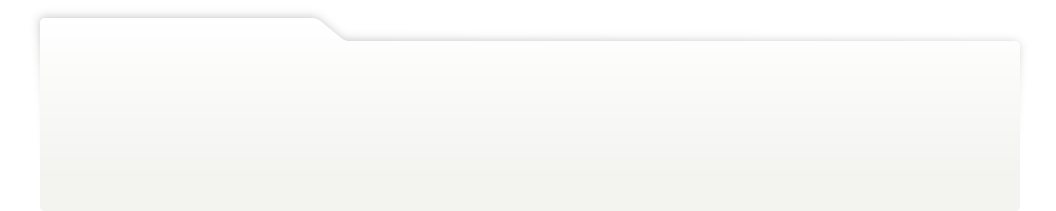
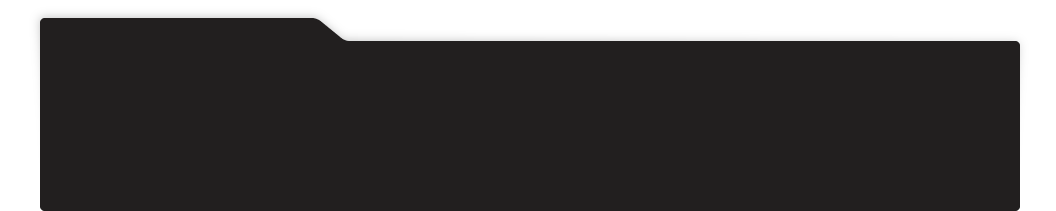
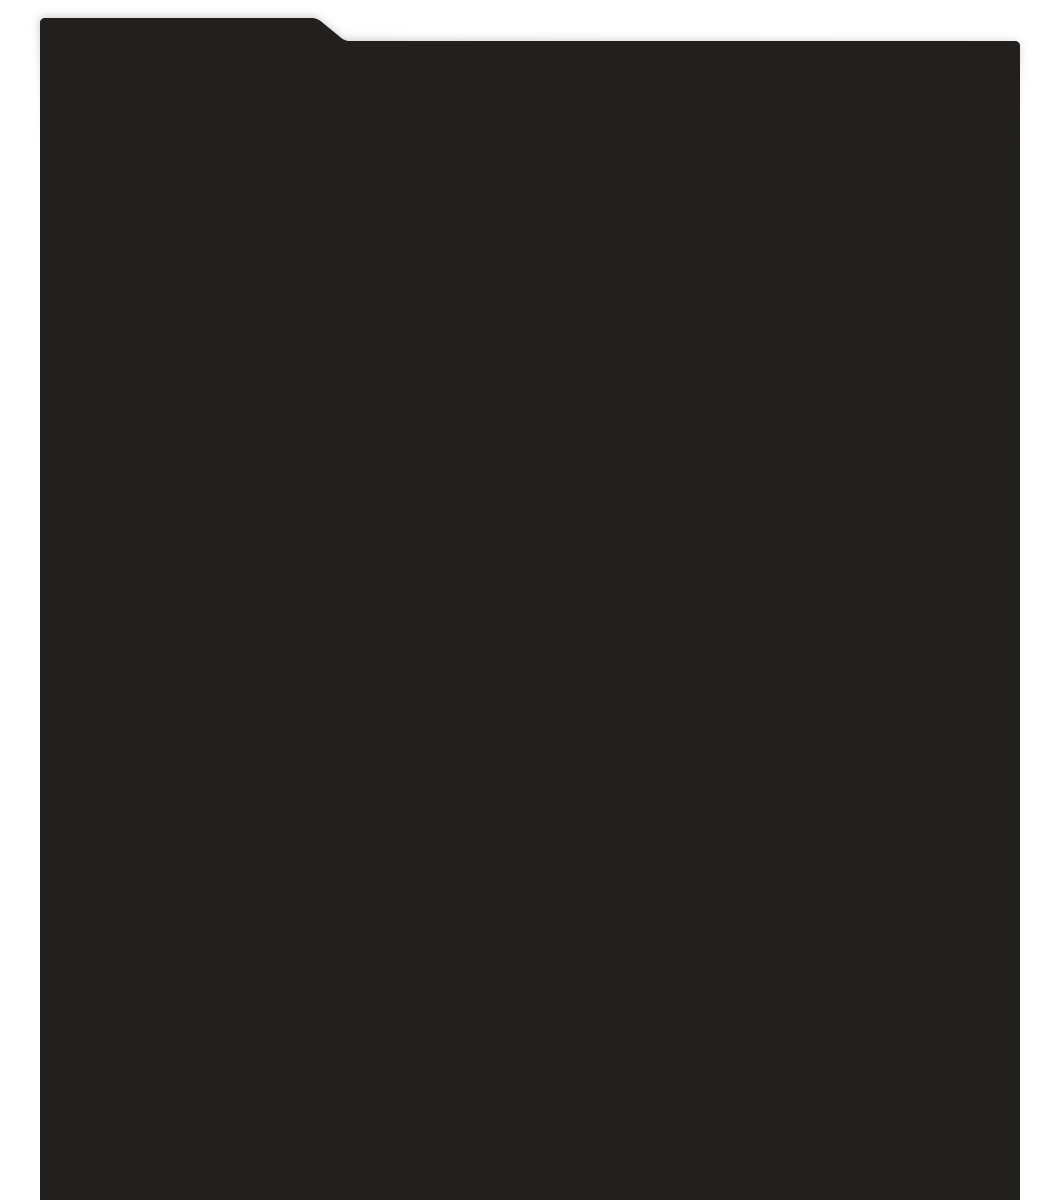
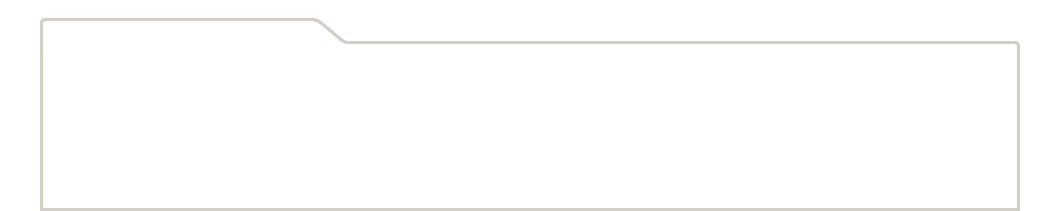
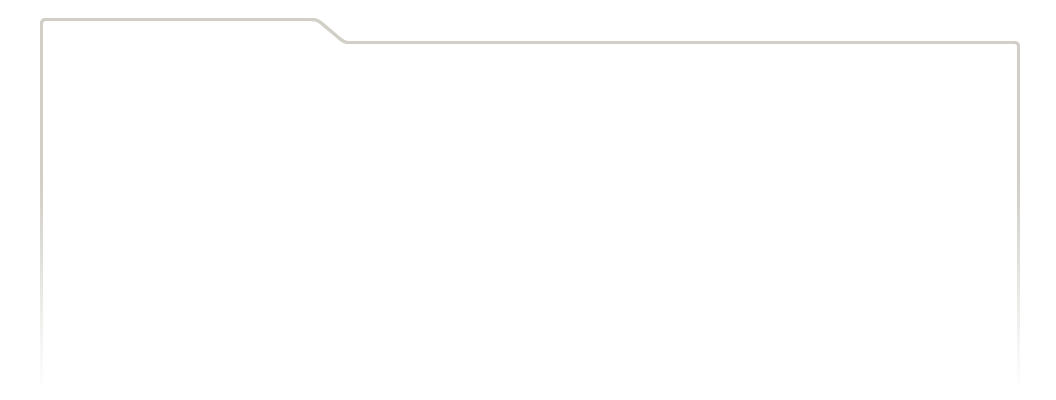
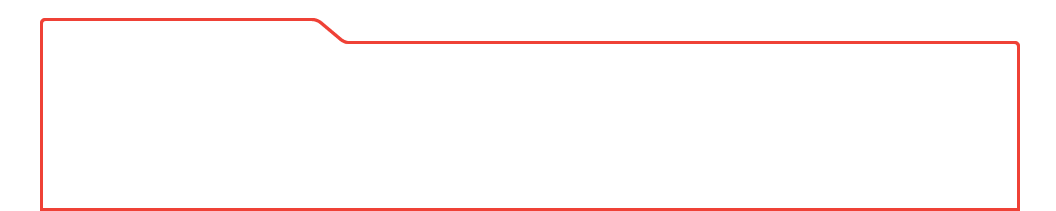
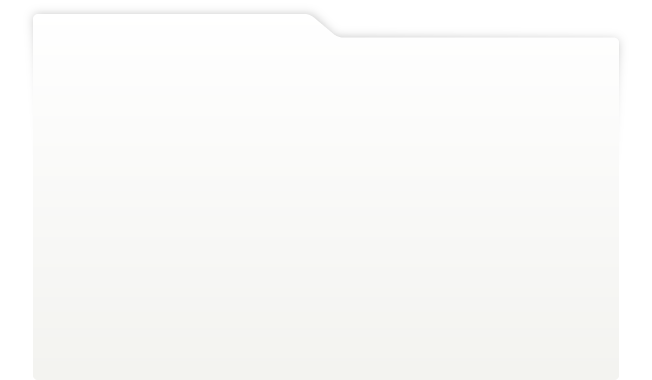
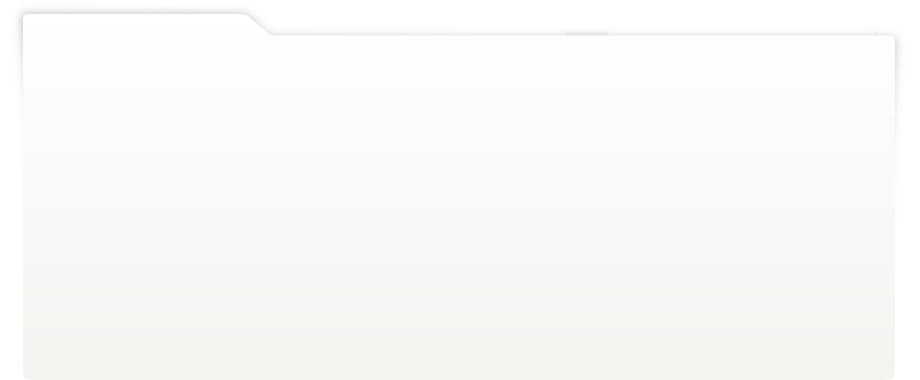
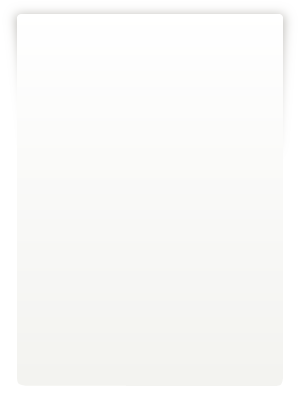
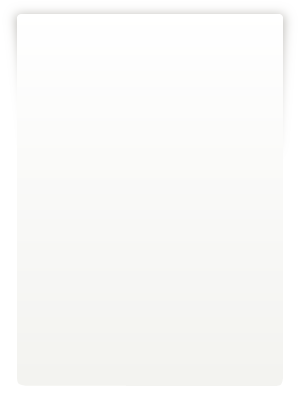
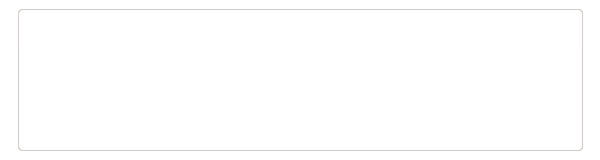
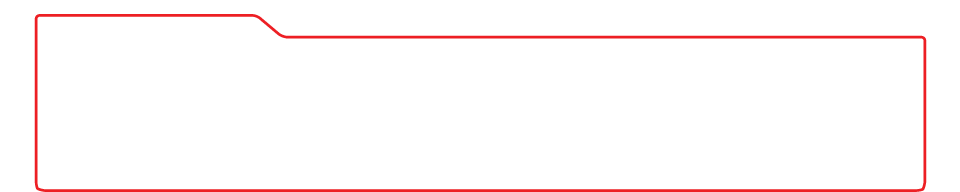
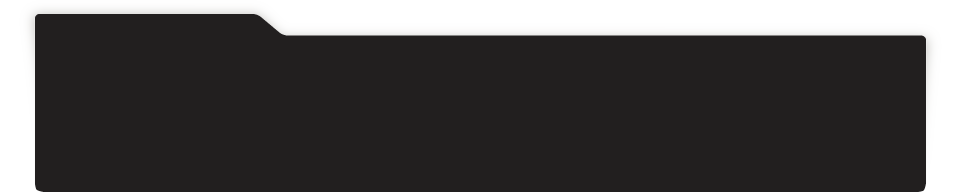
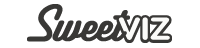
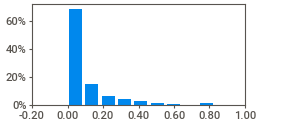
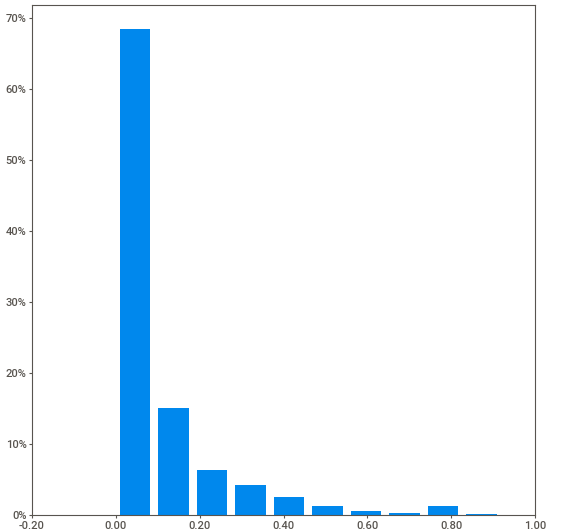
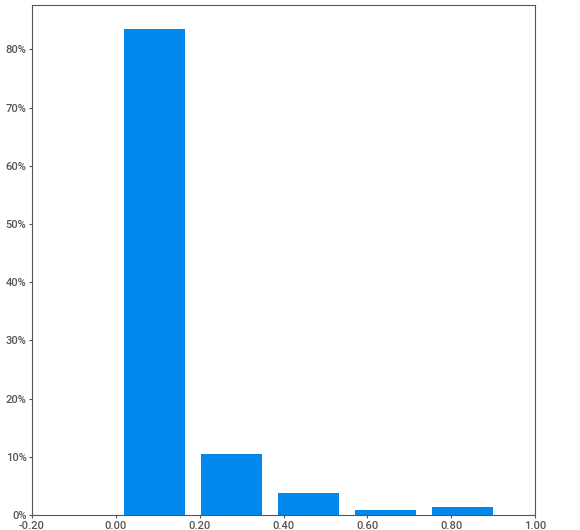
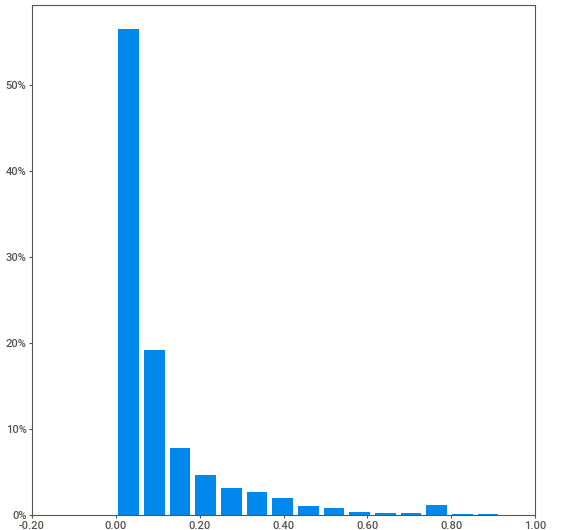
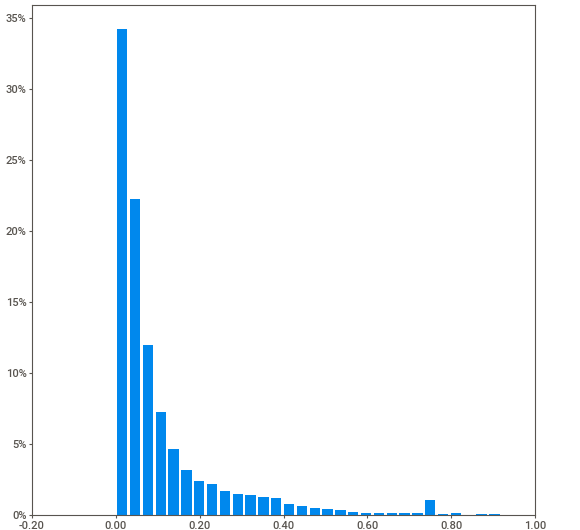
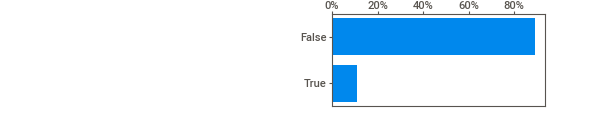
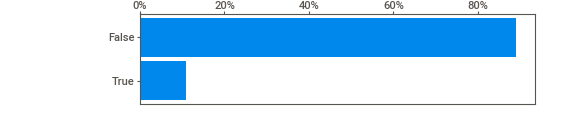
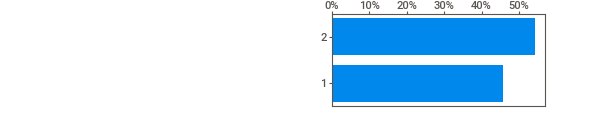
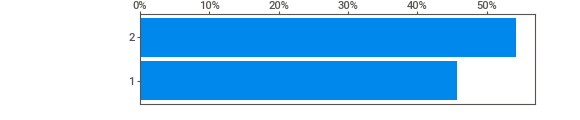
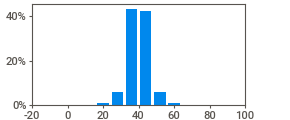
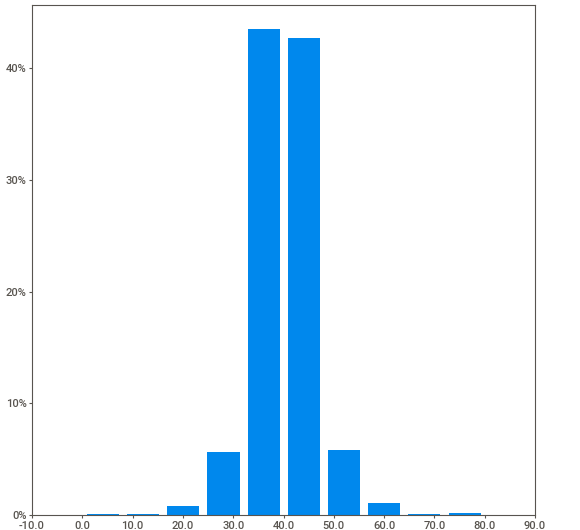
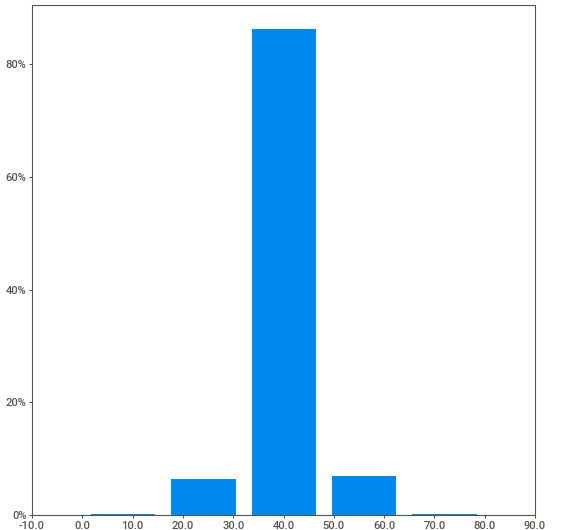
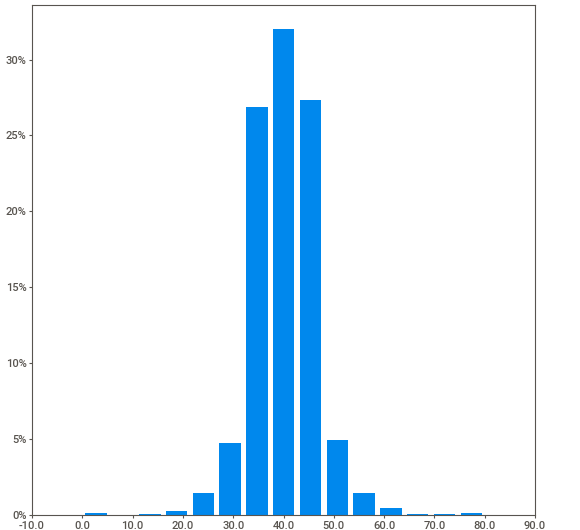
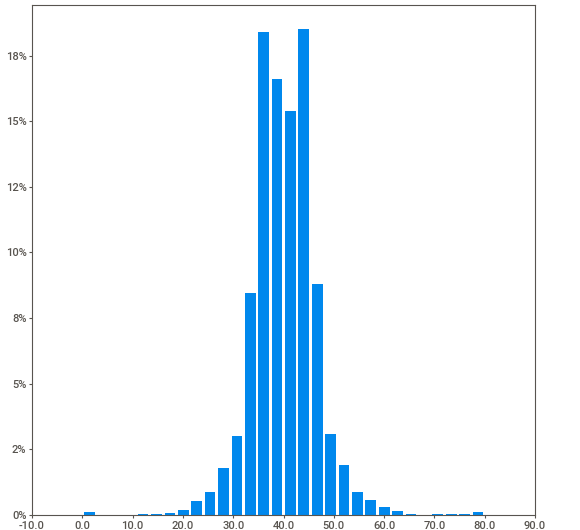
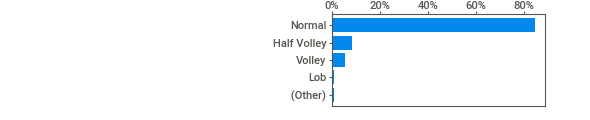
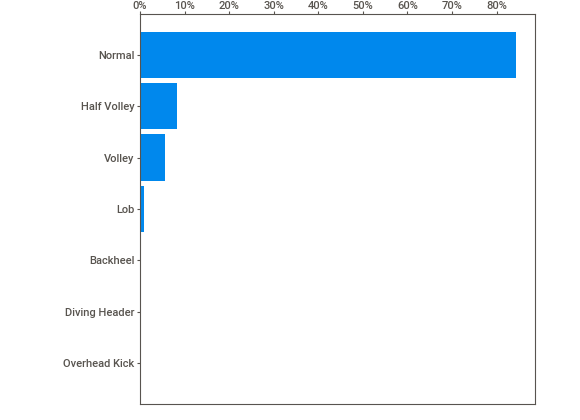
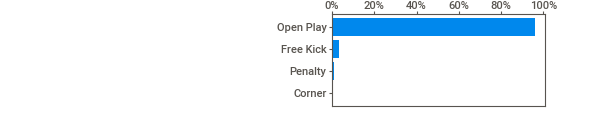
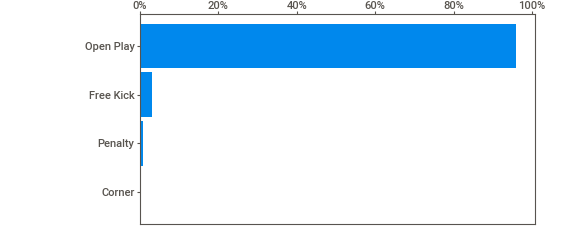
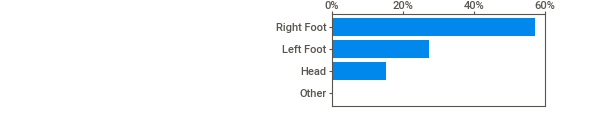
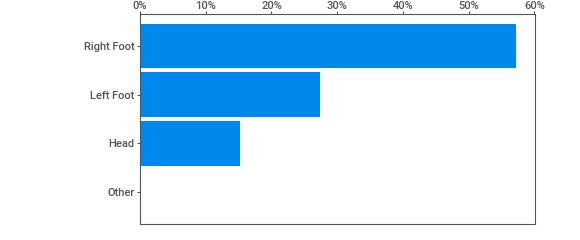
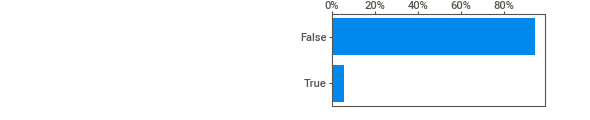
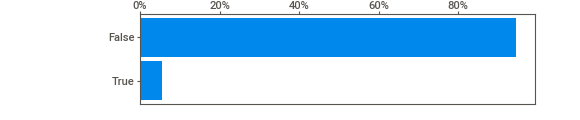
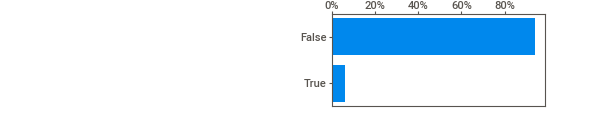
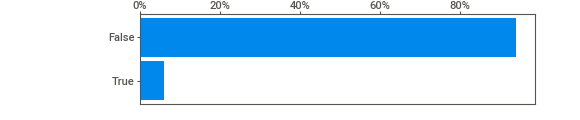
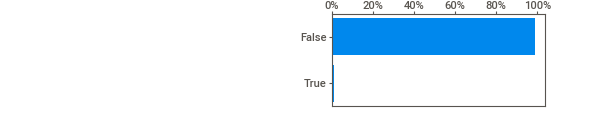
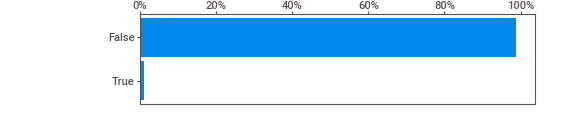
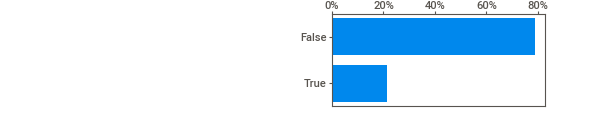
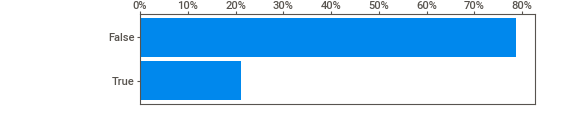
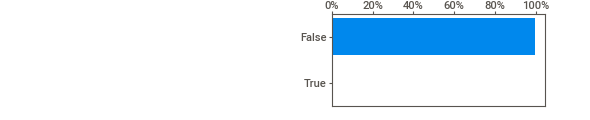
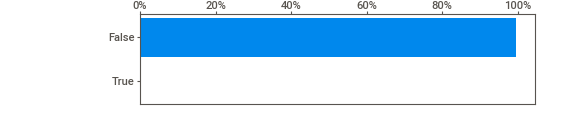
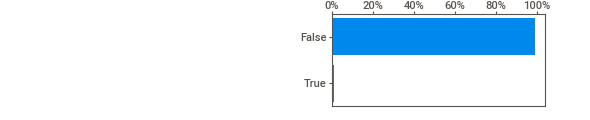
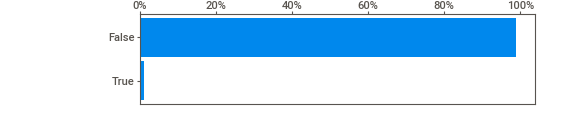
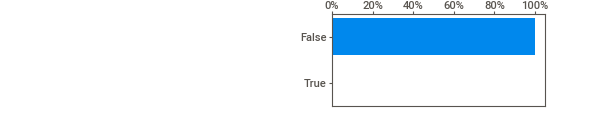
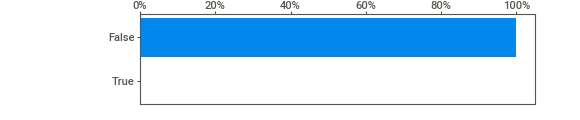
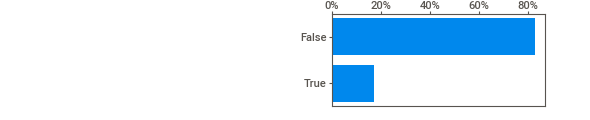
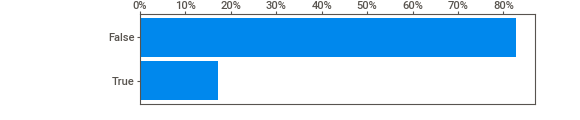
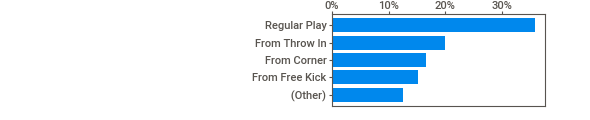
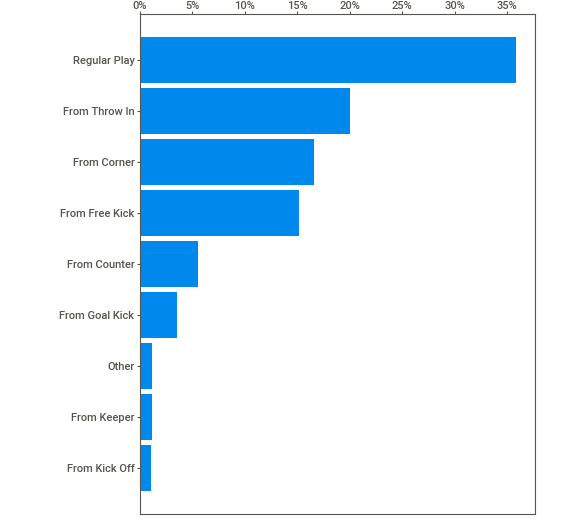
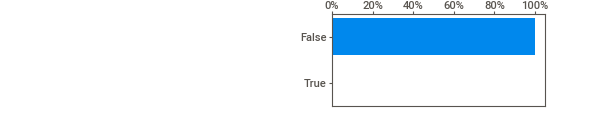
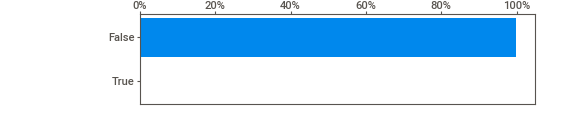
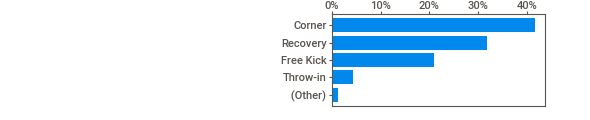
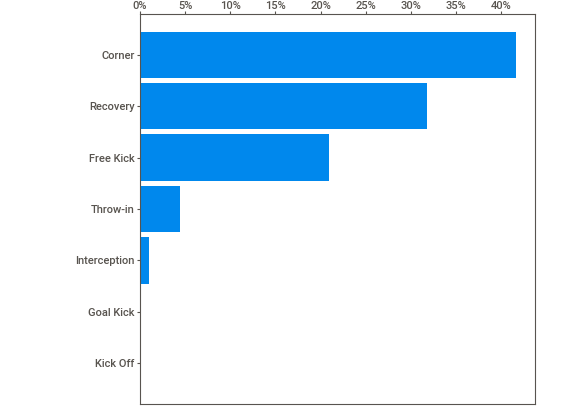
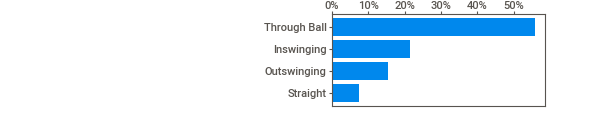
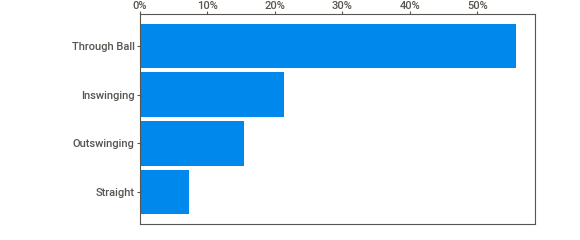
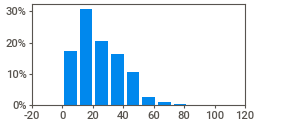
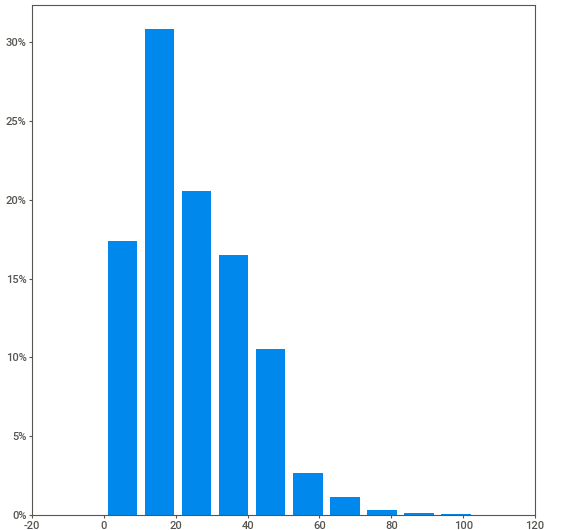
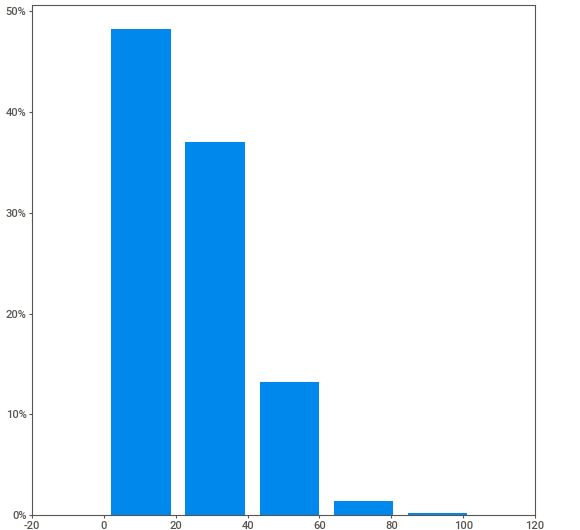
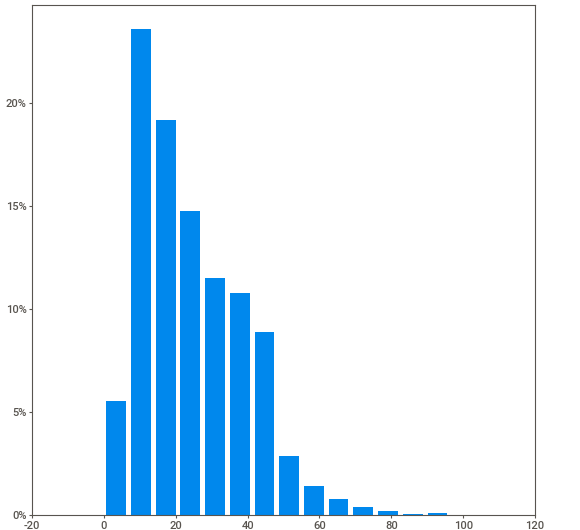
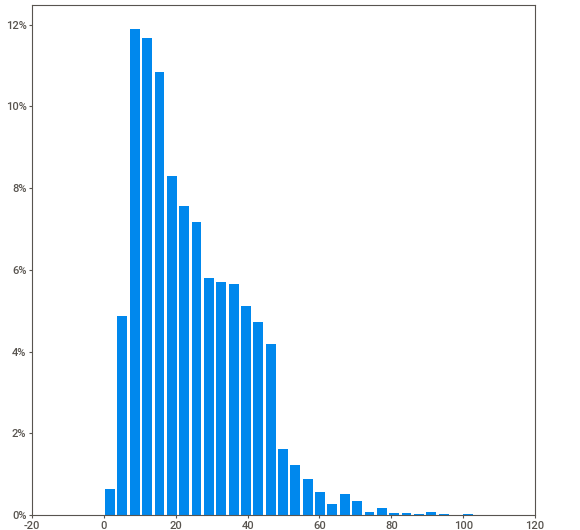
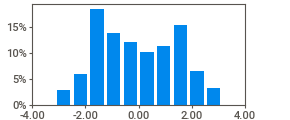
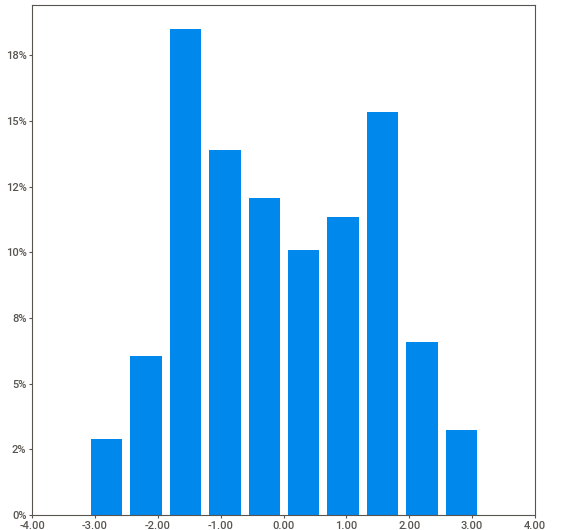
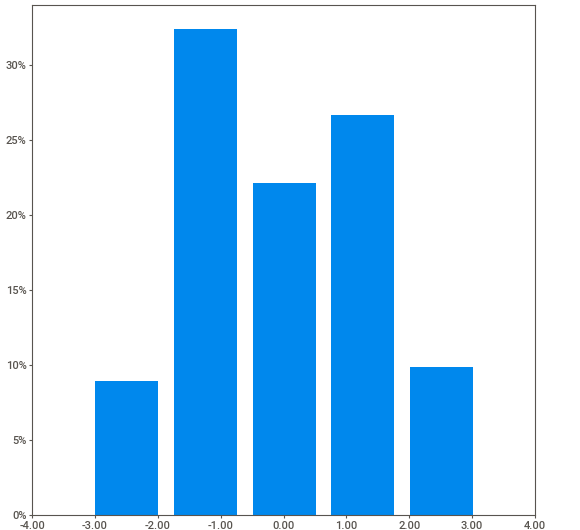
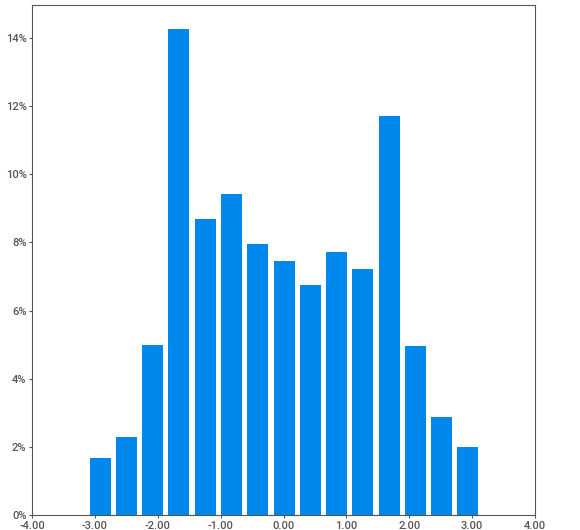
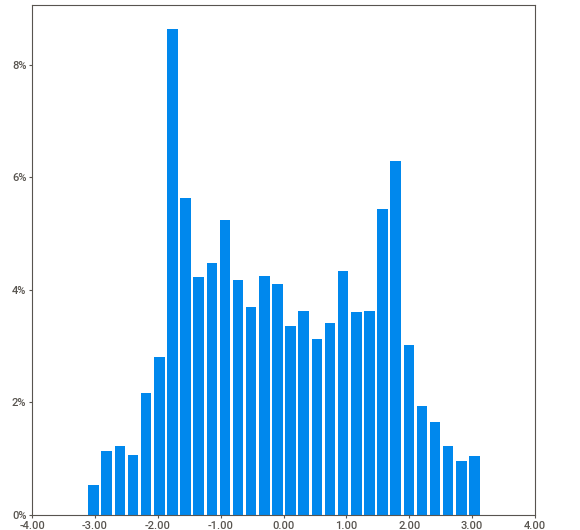
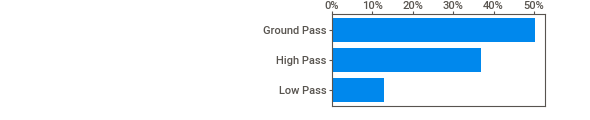
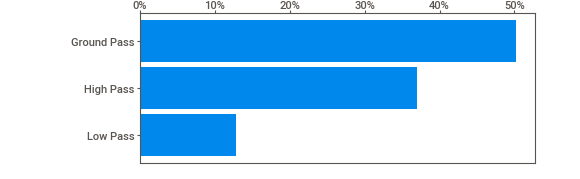
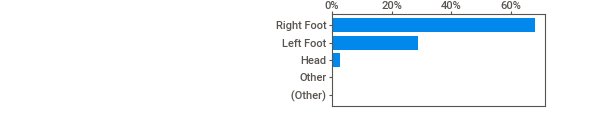
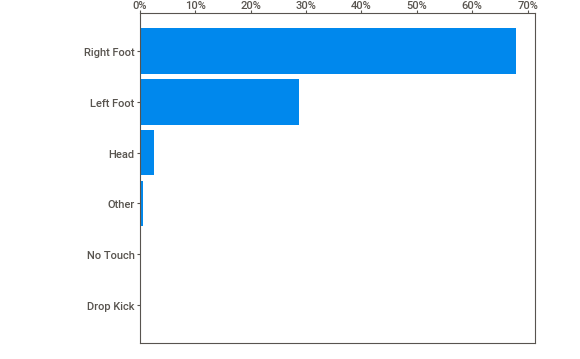
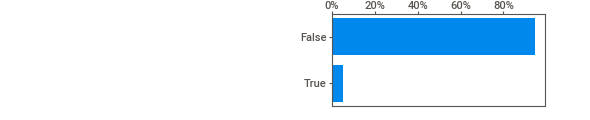
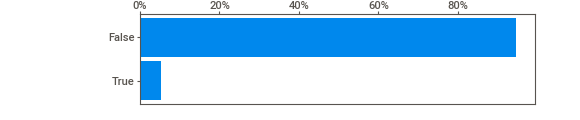
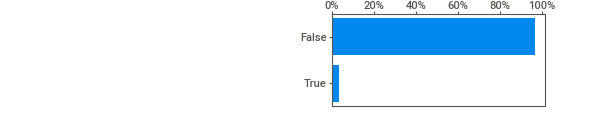
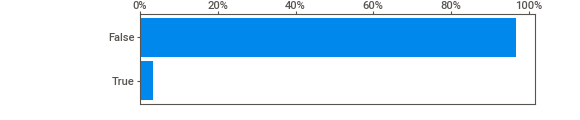
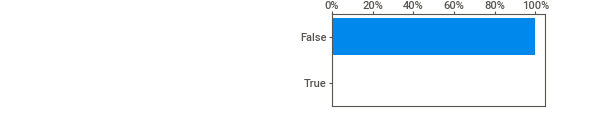
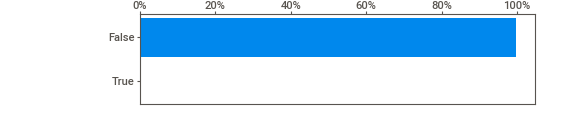
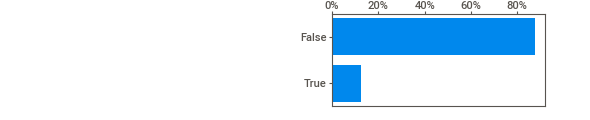
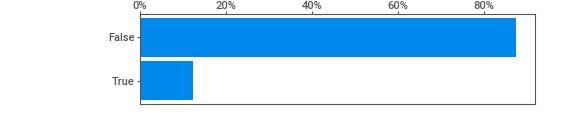
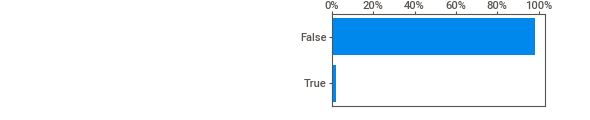
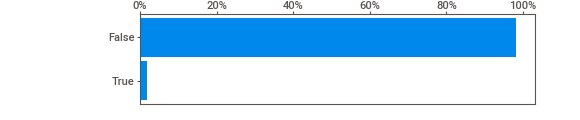
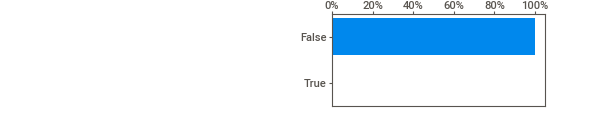
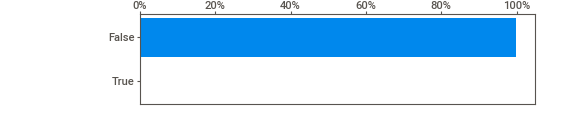
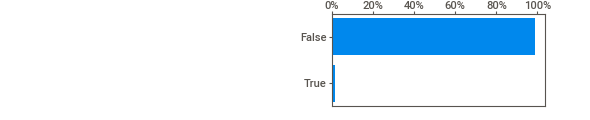
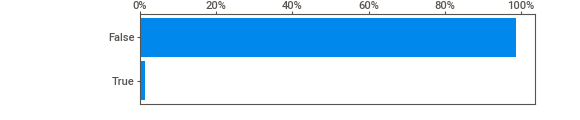
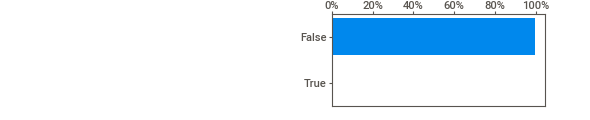
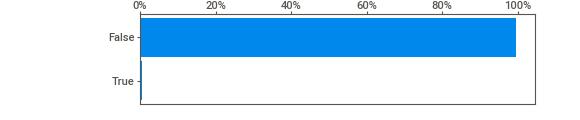
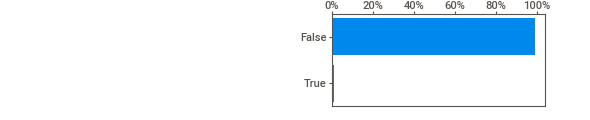
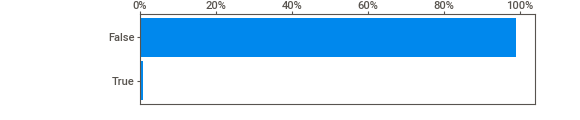
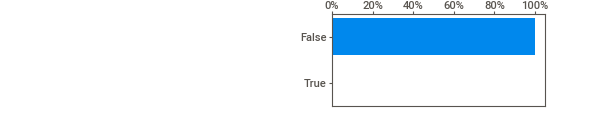
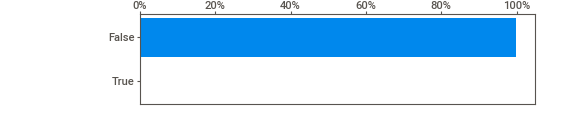
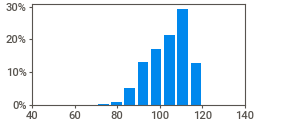
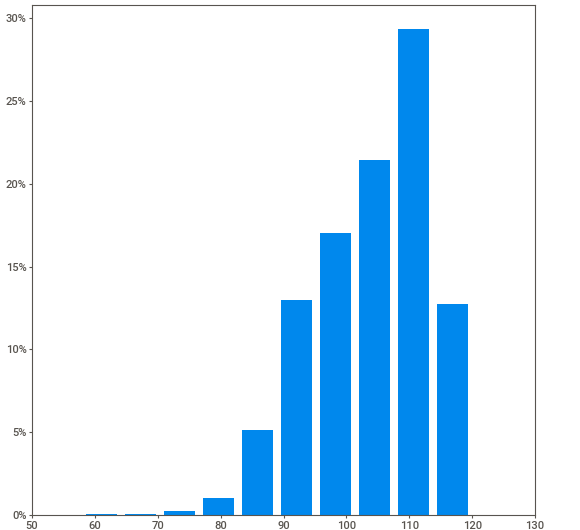
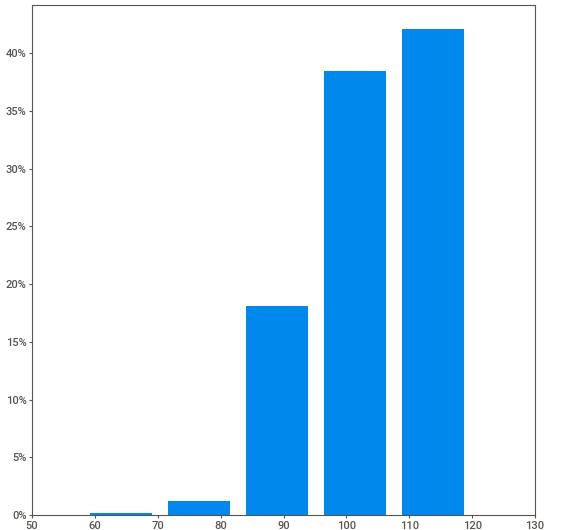
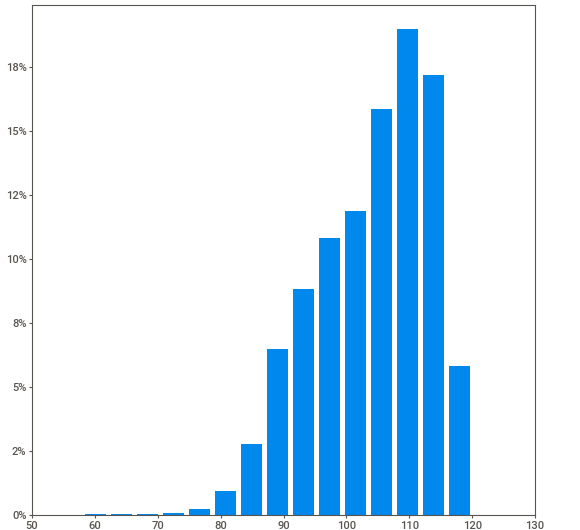
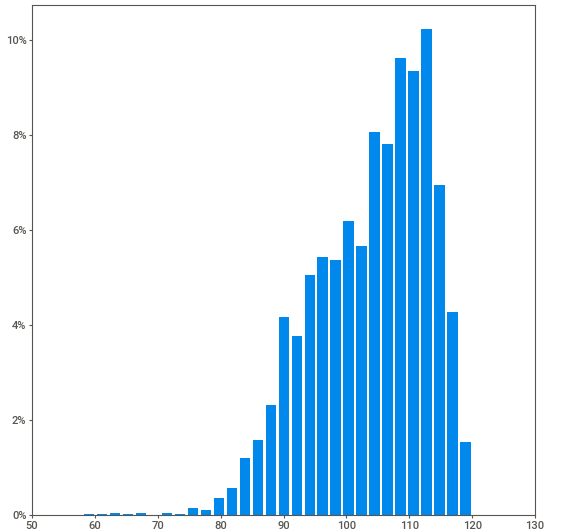
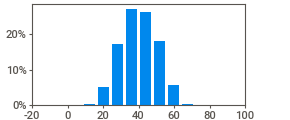
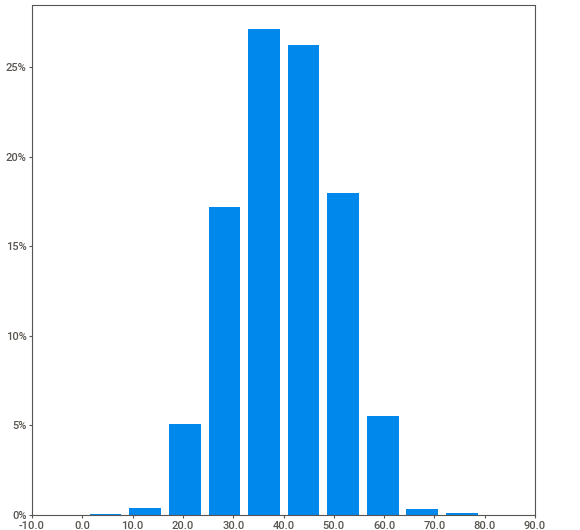
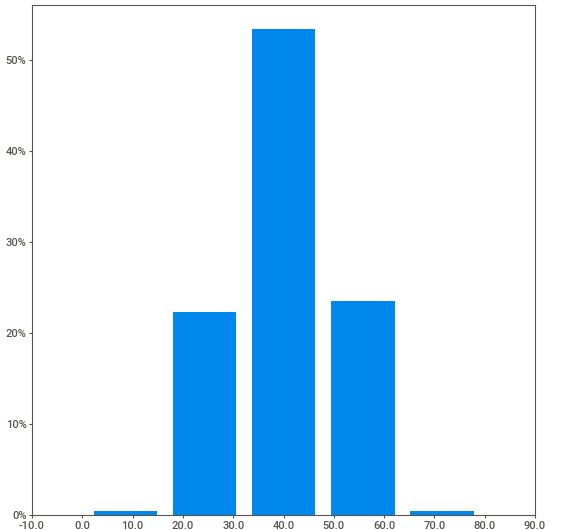
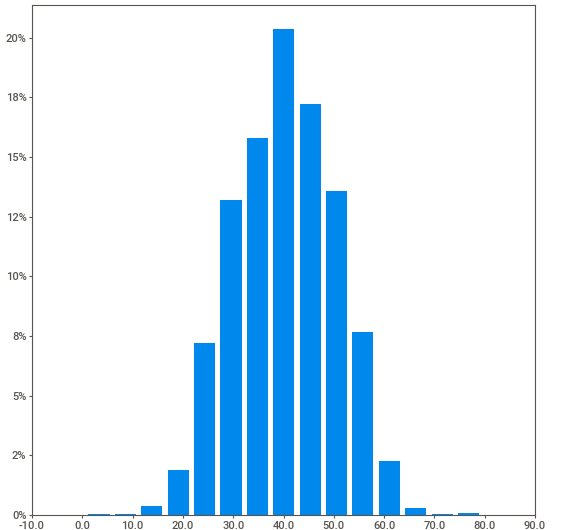
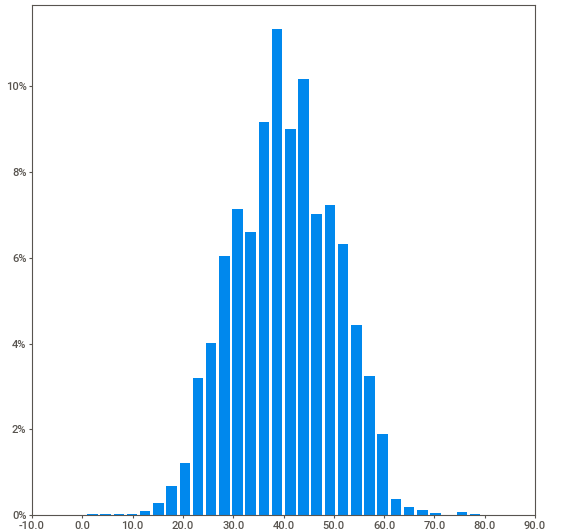
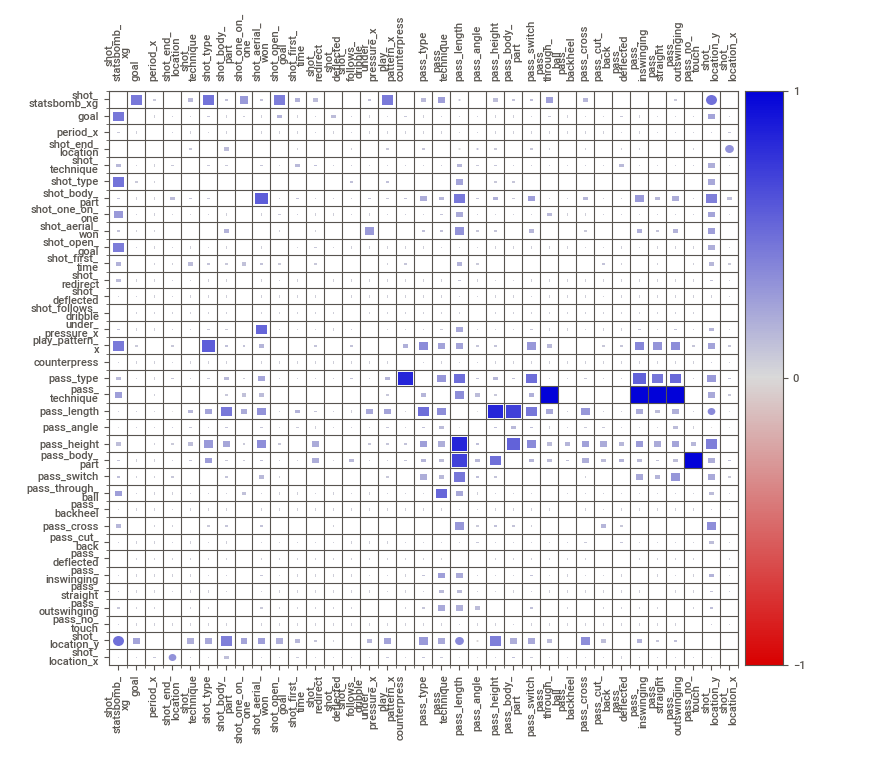
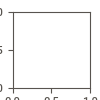

In [247]:
sv_report = sv.analyze(extracted_data)
sv_report.show_notebook()

* For the sake of simplicity in eventual results, values combined if:
  * Values likely represent the same description but may be recorded differently due to subjectivity in recording methods
  * Values both account for a low percentage of the total and, by definition, can be justified as another value

* Features with data extracted from multiple locations due to subjectivity in recording combined and their values standardized

* NA replaced with appropriate descriptions of why they are likely missing

* Assume the following are unique identifiers, and, therefore, will not be modified:
  * player
  * team
  * shot_distance
  * shot_angle

## Time

In [ ]:
# Convert time datatype to datetime

data_with_engineered_features['time'] = data_with_engineered_features['time'].astype(str)
data_with_engineered_features['time'] = pd.to_datetime(data_with_engineered_features['time'])

In [ ]:
print('Earliest Goal:', data_with_engineered_features['time'].dt.time.min())
print('Latest Goal:', data_with_engineered_features['time'].dt.time.max())

Earliest Goal: 00:00:07.476000
Latest Goal: 00:54:19.062000


In [ ]:
# Based on the distribution of times, assume time is measured from start of each half
# 00:00-45:00, plus stoppage-time

# Time does not appear to be measured from start of game, 00:00-90:00, plus stoppage-time

# Time does not appear to be measured as time of day

In [ ]:
# Convert time datatype to integer for minutes

# Because time is measured from start of each half, date and hours are not valuable
# Because of uniqueness of time as a variable and assuming subjectivity in recording,
# drop seconds

# Converting to integer will allow for direct inclusion in eventual modeling

# Convert time to int for minutes

data_with_engineered_features['time'] = data_with_engineered_features['time'].dt.minute

In [ ]:
data_with_engineered_features['time'].describe()

count    6104.000000
mean       23.864187
std        13.977114
min         0.000000
25%        12.000000
50%        24.000000
75%        36.000000
max        54.000000
Name: time, dtype: float64

## Significant Time

In [ ]:
# Display value counts for significant_time

data_with_engineered_features['significant_time'].value_counts()

Regular Time     4433
Last 5min         611
First 5min        611
Stoppage Time     449
Name: significant_time, dtype: int64

In [ ]:
# Assess ratio of shots and goals within specified intervals

# Create a dataframe of time intervals

time_intervals_list = ['First 5min', 'Regular Time',
                       'Last 5min', 'Stoppage-Time']

time_intervals_df = pd.DataFrame(time_intervals_list)

# Calculate ratios each interval represents of total

time_ratios_list = []
time_ratios_list.append((round(((5 / 45) * 100), 2)))
time_ratios_list.append((round((((40 - 5) / 45) * 100), 2)))
time_ratios_list.append((round((((45 - 40) / 45) * 100), 2)))
time_ratios_list.append((round((((55 - 45) / 45) * 100), 2)))

time_ratios_df = pd.DataFrame(time_ratios_list)

# Concatenate time_intervals_df and time_ratios_df

time_interval_ratios = pd.concat([time_intervals_df,
                                  time_ratios_df],
                                  axis = 1)
time_interval_ratios.columns = ['Time Interval', 'Ratio Time']

# Calculate ratio of shots within defined time intervals

shot_time_ratios = []
shot_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['time'] <
                                             5)])) /
                          (len(data_with_engineered_features)) * 100), 2))
shot_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['time'] >
                                             5) &
                                            (data_with_engineered_features['time'] <
                                             40)])) /
                          (len(data_with_engineered_features)) * 100), 2))
shot_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['time'] >
                                             40) &
                                            (data_with_engineered_features['time'] <
                                             45)])) /
                          (len(data_with_engineered_features)) * 100), 2))
shot_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['time'] >
                                             45)])) /
                          (len(data_with_engineered_features)) * 100), 2))

# Add shot_time_ratios to time_interval_ratios

time_interval_ratios['Ratio Total Shots'] = shot_time_ratios

# Calculate ratio of goals within defined time intervals

goal_time_ratios = []
goal_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                 (data_with_engineered_features['time'] <
                                                  5)]) /
                                len(data_with_engineered_features[data_with_engineered_features['goal'] == 'True'])) * 100), 2))
goal_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                 (data_with_engineered_features['time'] >
                                                  5) &
                                                 (data_with_engineered_features['time'] <
                                                  40)]) /
                                len(data_with_engineered_features[data_with_engineered_features['goal'] == 'True'])) * 100), 2))
goal_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                 (data_with_engineered_features['time'] >
                                                  40) &
                                                 (data_with_engineered_features['time'] <
                                                  45)]) /
                                len(data_with_engineered_features[data_with_engineered_features['goal'] == 'True'])) * 100), 2))
goal_time_ratios.append(round(((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                 (data_with_engineered_features['time'] >
                                                  45)]) /
                                len(data_with_engineered_features[data_with_engineered_features['goal'] == 'True'])) * 100), 2))

# Add goal_time_ratios to time_interval_ratios

time_interval_ratios['Ratio Total Goals'] = goal_time_ratios

# Calculate the ratio of shots within the interval which resulted in a goal

goal_shot_time_ratios = []
goal_shot_time_ratios.append(round((((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                                        (data_with_engineered_features['time'] < 5)]))/
                                     (len(data_with_engineered_features[(data_with_engineered_features['time'] < 5)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                                        (data_with_engineered_features['time'] > 5) &
                                                                        (data_with_engineered_features['time'] < 35)]))/
                                     (len(data_with_engineered_features[(data_with_engineered_features['time'] > 5) &
                                                                        (data_with_engineered_features['time'] < 35)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                                        (data_with_engineered_features['time'] > 40) &
                                                                        (data_with_engineered_features['time'] < 45)]))/
                                     (len(data_with_engineered_features[(data_with_engineered_features['time'] > 40) &
                                                                        (data_with_engineered_features['time'] < 45)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(data_with_engineered_features[(data_with_engineered_features['goal'] == 'True') &
                                                                        (data_with_engineered_features['time'] > 45)]))/
                                     (len(data_with_engineered_features[(data_with_engineered_features['time'] > 45)]))) *
                                    100), 2))
# Add goal_shot_time_ratios to time_interval_ratios

time_interval_ratios['Ratio Goals within Interval'] = goal_shot_time_ratios

time_interval_ratios = time_interval_ratios[['Time Interval',
                                            'Ratio Time',
                                            'Ratio Total Shots',
                                            'Ratio Total Goals',
                                            'Ratio Goals within Interval']]
# Display results

time_interval_ratios

,Time Interval,Ratio Time,Ratio Total Shots,Ratio Total Goals,Ratio Goals within Interval
0,First 5min,11.11,10.01,9.46,10.31
1,Regular Time,77.78,70.77,74.17,11.46
2,Last 5min,11.11,8.06,7.81,10.57
3,Stoppage-Time,22.22,5.36,3.75,7.65


In [ ]:
# Ratio of shots and goals do not vary significantly from ratio of time

# Ratio of goals within specified intervals do not vary significantly

# Time intervals are not significantly linked with goals

# Drop significant_time

data_with_engineered_features.drop('significant_time',
                                   axis = 1,
                                   inplace = True)

## Bodypart

In [ ]:
# Display value counts for bodypart

display(data_with_engineered_features['bodypart'].value_counts(dropna = False))

Right Foot    3493
Left Foot     1676
Head           926
Other            9
Name: bodypart, dtype: int64

In [ ]:
# Rename 'Other' as 'Other Bodypart' for clarity

data_with_engineered_features['bodypart'].replace({'Other' : 'Other Bodypart'},
                                                  inplace = True)

In [ ]:
# No NA values

## Bodypart Angle

In [ ]:
data_with_engineered_features['bodypart_angle'].value_counts()

Right - Outside Foot    1882
Left - Inside Foot      1518
Left - Outside Foot      891
Right - Inside Foot      734
Right - Head             440
Left - Head              436
Other                    203
Name: bodypart_angle, dtype: int64

In [ ]:
# Create a dataframe of shot angle intervals

bodypart_angle_list = data_with_engineered_features['bodypart_angle'].unique()

bodypart_angle_ratio = pd.DataFrame(bodypart_angle_list)

bodypart_angle_ratio.rename(columns = {bodypart_angle_ratio.columns[0] : 'Bodypart Angle' },
                            inplace = True)

# Calculate ratio of shots and goals by bodypart

bodypart_angle_shot_ratio = []
bodypart_angle_goal_ratio = []
bodypart_angle_goal_shot_ratio = []
for i in bodypart_angle_list:
  bodypart_angle_shot_ratio.append(round((((len(data_with_engineered_features[data_with_engineered_features['bodypart_angle'] ==
                                                  i])) /
                                           (len(data_with_engineered_features))) *
                                          100), 2))
  
  bodypart_angle_goal_ratio.append(round((((len(data_with_engineered_features[(data_with_engineered_features['bodypart_angle'] ==
                                                  i) &
                                                  (data_with_engineered_features['goal'] == 'True')])) /
                                           (len(data_with_engineered_features[data_with_engineered_features['goal'] == 'True']))) *
                                          100), 2))
  
  bodypart_angle_goal_shot_ratio.append(round((((len(data_with_engineered_features[(data_with_engineered_features['bodypart_angle'] ==
                                                                                    i) &
                                                                                   (data_with_engineered_features['goal'] == 'True')])) /
                                                (len(data_with_engineered_features[data_with_engineered_features['bodypart_angle'] ==
                                                                                   i]))) *
                                               100), 2))

bodypart_angle_ratio['Ratio of Total Shots'] = bodypart_angle_shot_ratio
bodypart_angle_ratio['Ratio of Total Goals'] = bodypart_angle_goal_ratio
bodypart_angle_ratio['Ratio of Goals with Bodypart and Angle'] = bodypart_angle_goal_shot_ratio

bodypart_angle_ratio

,Bodypart Angle,Ratio of Total Shots,Ratio of Total Goals,Ratio of Goals with Bodypart and Angle
0,Right - Inside Foot,12.02,11.86,10.76
1,Left - Head,7.14,6.91,10.55
2,Left - Outside Foot,14.60,12.31,9.20
3,Left - Inside Foot,24.87,21.32,9.35
4,Right - Outside Foot,30.83,33.18,11.74
5,Right - Head,7.21,8.86,13.41
6,Other,3.33,5.56,18.23


In [ ]:
# Difference in ratios for inside-foot v outside-foot on each side are not
# significantly different from the difference between right-foot and left-foot
# when applied to the ratio of right-side v left-side

# Drop bodypart_angle

data_with_engineered_features.drop('bodypart_angle',
                                   axis = 1,
                                   inplace = True)

## Technique

In [ ]:
# Display value counts for technique

data_with_engineered_features['technique'].value_counts(dropna = False)

Normal           5154
Half Volley       509
Volley            337
Lob                55
Backheel           20
Diving Header      15
Overhead Kick      14
Name: technique, dtype: int64

In [ ]:
# Rename 'Normal' as 'Ground' for clarity

# 'Lob' and 'Backheel' are types of shots from the ground, so can be included as 'Ground'

# 'Half Volley', 'Diving Header', and 'Overhead Kick' are types of shots from the air,
# so can be included as 'Volley'

data_with_engineered_features['technique'].replace({'Normal' : 'Ground',
                                                    'Half Volley' : 'Volley',
                                                    'Lob' : 'Ground',
                                                    'Backheel' : 'Ground',
                                                    'Diving Header' : 'Volley',
                                                    'Overhead Kick' : 'Volley'},
                                                   inplace = True)

In [ ]:
# No NA values

In [ ]:
data_with_engineered_features['technique'].value_counts()

Ground    5229
Volley     875
Name: technique, dtype: int64

## First Touch

In [ ]:
# Display value counts for first_touch

data_with_engineered_features['first_touch'].value_counts(dropna = False)

False    4808
True     1296
Name: first_touch, dtype: int64

In [ ]:
# Values for first_touch are boolean

In [ ]:
# No NA values

## Assist

In [ ]:
# Display value counts for assist1

data_with_engineered_features['assist1'].value_counts(dropna = False)

Ground Pass    2088
NaN            1953
High Pass      1532
Low Pass        531
Name: assist1, dtype: int64

In [ ]:
# Display value counts for assist2

data_with_engineered_features['assist2'].value_counts(dropna = False)

NaN             5746
Through Ball     200
Inswinging        76
Outswinging       56
Straight          26
Name: assist2, dtype: int64

In [ ]:
# Display value counts for assist3

data_with_engineered_features['assist3'].value_counts(dropna = False)

NaN             5104
Cross            758
Through Ball     197
Cut Back          45
Name: assist3, dtype: int64

In [ ]:
# assist1 was extracted from the 'pass' subset of the Statsbomb events data
# which only defined value 'Cross'

# assist2 was extracted from the 'technique' subset of the StatsBomb events data
# and defines values 'Outswinging', 'Inswinging', and 'Straight' as types of crosses

# assist3 was extracted from StatsBomb events data points which included
# unique subsets 'Cross', 'Cut Back', and 'Through Ball' with boolean values

# For consistency, 'Outswinging', 'Inswinging', and 'Straight', from assist2 can be
# included as 'Cross'

# 'Cut Back' can be included as 'Cross'

data_with_engineered_features['assist2'].replace({'Outswinging' : 'Cross',
                                   'Straight' : 'Cross',
                                   'Inswinging' : 'Cross'},
                                 inplace = True)

data_with_engineered_features['assist3'].replace({'Cut Back' : 'Cross'},
                                 inplace = True)

In [ ]:
# Combined three sources of assist data into single feature

data_with_engineered_features['assist3'].fillna(data_with_engineered_features['assist2'],
                                                inplace = True)
data_with_engineered_features['assist3'].fillna(data_with_engineered_features['assist1'],
                                                inplace = True)

data_with_engineered_features.drop(['assist1', 'assist2'],
                    axis = 1,
                    inplace = True)

data_with_engineered_features.rename(columns = {'assist3': 'assist'},
                      inplace = True)

In [ ]:
# Fill NA values with 'Unassisted'

# Assume shots with NA assist values were unassisted
# Shooting player did not receive the ball via a pass from a teammate

data_with_engineered_features['assist'].fillna('Unassisted',
                                inplace = True)

In [ ]:
# Display value counts for new combined assist

data_with_engineered_features['assist'].value_counts(dropna = False)

Unassisted      1953
Ground Pass     1787
Cross            961
High Pass        830
Low Pass         376
Through Ball     197
Name: assist, dtype: int64

## State of Play

In [ ]:
# Display value counts for state_of_play

data_with_engineered_features['state_of_play'].value_counts(dropna = False)

Open Play    5858
Free Kick     191
Penalty        53
Corner          2
Name: state_of_play, dtype: int64

In [ ]:
# Rename 'Open Play' as 'Open Play - Shot' for clarity v 'Open Play - Assist'

# Add precursor 'Set Piece' to 'Free Kick' and 'Penalty' to specify 
# set piece type v open play type

# Replace 'Free Kick' with 'Direct Free Kick', to specify shot taken directly v 
# 'From Freekick' in assist_state_of_play

# 'Corner' implies shot direct on goal from corner set piece
# Due to only occuring 2 times, despite not being same type of play, the intent, 
# a direct shot from set piece is the same, therefore, can be included as 
# 'Direct Free Kick'

data_with_engineered_features['state_of_play'].replace({'Open Play' : 'Open Play - Shot',
                                                        'Free Kick' : 'Set Piece - Direct Free Kick',
                                                        'Penalty' : 'Set Piece - Penalty',
                                                        'Corner' : 'Set Piece - Direct Free Kick'},
                                                       inplace = True)

In [ ]:
# No NA values

In [ ]:
data_with_engineered_features['state_of_play'].value_counts(dropna = False)

Open Play - Shot                5858
Set Piece - Direct Free Kick     193
Set Piece - Penalty               53
Name: state_of_play, dtype: int64

## Assist State of Play Values

In [ ]:
# Display value counts for assist_state_of_play

data_with_engineered_features['assist_state_of_play'].value_counts(dropna = False)

NaN               1953
Regular Play      1608
From Throw In      844
From Corner        667
From Free Kick     489
From Counter       296
From Goal Kick     146
From Keeper         48
From Kick Off       45
Other                8
Name: assist_state_of_play, dtype: int64

In [ ]:
# Replace 'Regular Play' with 'Open Play - Assist' for clarity

# Add precursor 'Set Piece' to 'From Throw In', 'From Corner',
# 'From Free Kick', and 'From Goal Kick' to specify set piece type v open play type

# 'From Keeper' is an assist from open play, specifically 
# from the keeper v 'From Goal Kick', which is likely also from the keeper,
# but a goal kick set piece
# 'From Keeper' can be included with 'Open Play - Assist'

# 'From Kickoff' only occurs 45 times, despite a kickoff being a set piece type,
# due to the distance the play travels, can be included as 'Open Play - Assist'

# Replace 'From Counter' with 'Open Play - Counter Attack' to specify assist from open play,
# but specifically from counter attack

# Due to lack of specificity, assume 'Other' can be included with 'Open Play'
# NA value count, 1953, matches the count from assist, assume 'Other' cannot
# be included with NA

data_with_engineered_features['assist_state_of_play'].replace({'Regular Play' : 'Open Play - Assist',
                                                'From Throw In' : 'Set Piece - Throw In',
                                                'From Corner' : 'Set Piece - Corner',
                                                'From Free Kick' : 'Set Piece - Free Kick',
                                                'From Counter' : 'Open Play - Counter Attack',
                                                'From Goal Kick' : 'Set Piece - Goal Kick',
                                                'From Keeper' : 'Open Play - Assist',
                                                'From Kick Off' : 'Open Play - Assist',
                                                'Other' : 'Open Play - Assist'},
                                               inplace = True)

In [ ]:
# Fill NA values with 'No Assist'

# Assume shots with NA assist_state_of_play values unassisted

data_with_engineered_features['assist_state_of_play'].fillna('No Assist',
                                              inplace = True)

In [ ]:
data_with_engineered_features['assist_state_of_play'].value_counts()

No Assist                     1953
Open Play - Assist            1709
Set Piece - Throw In           844
Set Piece - Corner             667
Set Piece - Free Kick          489
Open Play - Counter Attack     296
Set Piece - Goal Kick          146
Name: assist_state_of_play, dtype: int64

In [ ]:
# 'Open Play - From Counter' will be retained separate, despite accounting
# for low percentage of total due to uniqueness of the state of play and expectation 
# of comparitively high correlations with high xG

# Location

In [ ]:
# location_x and location_y values were utilized to engineer shot_distance, inside_18,
# and shot_angle, and are no longer relevant independently

# Drop location_x and location_y

data_with_engineered_features.drop(['location_x',
                                    'location_y'],
                                   axis = 1,
                                   inplace = True)

# Inside 18

In [ ]:
print('Ratio of Shots Within the Width of the 18-Yard Box:',
      (round((len(data_with_engineered_features[(data_with_engineered_features['inside_18_width'] == True)]) /
              (len(data_with_engineered_features)) * 100), 2)), '%')
print('Ratio of Shots Within the Depth of the 18-Yard Box:',
      (round((len(data_with_engineered_features[(data_with_engineered_features['inside_18_depth'] == True)]) /
              (len(data_with_engineered_features)) * 100), 2)), '%')
print('Ratio of Shots Within the 18-Yard Box:',
      (round((len(data_with_engineered_features[(data_with_engineered_features['inside_18'] == True)]) /
              (len(data_with_engineered_features)) * 100), 2)), '%')

Ratio of Shots Within the Width of the 18-Yard Box: 93.69 %
Ratio of Shots Within the Depth of the 18-Yard Box: 61.39 %
Ratio of Shots Within the 18-Yard Box: 58.78 %


In [ ]:
# Majority of shots within the width of the 18-yard box
# Difference between shots within depth and shots within both width and depth minimal
# inside_18_width and inside_18_depth not valuable independently

# Drop inside_18_width and inside_18_depth

data_with_engineered_features.drop(['inside_18_width',
                                    'inside_18_depth'],
                                   axis = 1,
                                   inplace = True)

# Combine State of Play with Assist State of Play

In [ ]:
# state_of_play only specifies shots directly from set piece type
# 'Set Piece - Direct Free Kick' and 'Set Piece - Penalty' v Open Play
# If an assist was received from a specified assist value, then the
# shot is still defined as open play

# assist_state_of_play includes greater variety defining the overall play

# Combine state_of_play values and assist_state_of_play

data_with_engineered_features['state_of_play'] = np.where(data_with_engineered_features['state_of_play'] == 'Open Play - Shot', 
                                                          data_with_engineered_features['assist_state_of_play'],
                                                          data_with_engineered_features['state_of_play'])

data_with_engineered_features.drop('assist_state_of_play',
                                   axis = 1,
                                   inplace = True)

data_with_engineered_features['state_of_play'].replace({'Open Play - Assist' : 'Open Play',
                                                        'No Assist' : 'Open Play - Unassisted'},
                                                       inplace = True)

In [ ]:
data_with_engineered_features['state_of_play'].value_counts()

Open Play                       1709
Open Play - Unassisted          1707
Set Piece - Throw In             844
Set Piece - Corner               667
Set Piece - Free Kick            489
Open Play - Counter Attack       296
Set Piece - Direct Free Kick     193
Set Piece - Goal Kick            146
Set Piece - Penalty               53
Name: state_of_play, dtype: int64

# Cleaned Data

In [ ]:
data_with_engineered_features = cleaned_data
cleaned_data.head()

,statsbomb_xg,goal,time,player,team,shot_distance,inside_18,shot_angle,bodypart,bodypart_angle,technique,first_touch,assist,state_of_play
0,0.266154,False,4,Francesca Kirby,Chelsea FCW,12.529964,True,118.61,Left Foot,Right - Inside Foot,Ground,False,Ground Pass,Open Play
1,0.093521,False,11,Bethany England,Chelsea FCW,8.602325,True,54.46,Head,Left - Head,Ground,False,High Pass,Set Piece - Free Kick
2,0.036171,False,18,Drew Spence,Chelsea FCW,26.172505,False,96.58,Left Foot,Right - Inside Foot,Ground,False,Ground Pass,Open Play
3,0.016625,False,23,Chloe Arthur,Birmingham City WFC,34.525353,False,79.99,Left Foot,Left - Outside Foot,Ground,False,Ground Pass,Set Piece - Goal Kick
4,0.030716,False,23,Bethany England,Chelsea FCW,26.925824,False,74.93,Right Foot,Left - Inside Foot,Ground,False,Ground Pass,Set Piece - Goal Kick


In [ ]:
cleaned_data.to_csv('/content/drive/MyDrive/flatiron/expected_goals/data_cleaning/data_with_engineered_features.csv')

Continued in [expected_goals_data_exploration_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_exploration/expected_goals_data_exploration_notebook.ipynb)

*5 of 8*